In [2]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Paths
data_zip_path = 'Deepdive.zip'
output_folder = 'Deepdive'

In [6]:
# Extract dataset if not already extracted
if not os.path.isdir(output_folder):
    with zipfile.ZipFile(data_zip_path, 'r') as zip_file:
        zip_file.extractall(output_folder)
        print("Dataset extracted successfully.")
else:
    print("Dataset already extracted.")

Dataset extracted successfully.


In [7]:
# Define directories
train_path = os.path.join(output_folder, 'train')
validation_path = os.path.join(output_folder, 'validation')
test_path = os.path.join(output_folder, 'test')

In [8]:
# Print directory paths
for dataset_type, directory in [('Train', train_path), ('Validation', validation_path), ('Test', test_path)]:
    print(f"{dataset_type} Directory: {directory}")

Train Directory: Deepdive/train
Validation Directory: Deepdive/validation
Test Directory: Deepdive/test


In [9]:
# Data augmentation and preprocessing configurations
train_augmenter = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=25,
    zoom_range=0.15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    horizontal_flip=True
)

val_test_augmenter = ImageDataGenerator(rescale=1.0/255.0)

In [10]:
# Generate batches of image data for training, validation, and testing
train_loader = train_augmenter.flow_from_directory(
    directory=train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_loader = val_test_augmenter.flow_from_directory(
    directory=validation_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_loader = val_test_augmenter.flow_from_directory(
    directory=test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

print("Data loaders are ready.")

Found 2667 images belonging to 33 classes.
Found 667 images belonging to 33 classes.
Found 660 images belonging to 33 classes.
Data loaders are ready.


In [24]:
# Data processing: Inspect class indices
print("Class Indices:")
print(train_loader.class_indices)


Class Indices:
{'Anthomastus Like coral': 0, 'Arborescent Stumpy Grey Branching Erect sponges': 1, 'Arborescent coral': 2, 'Attached Stony coral': 3, 'Bioturbation - Organism tests': 4, 'Bony fishes': 5, 'Colonial Unstalked Ascidian': 6, 'Crab': 7, 'Ctenophores jellies': 8, 'Cup-likes sponges': 9, 'Eels': 10, 'Feather stars': 11, 'Free-living coral': 12, 'General unknown biology': 13, 'Hermit Crab with Shell or Stone': 14, 'Irregular urchins': 15, 'Laminar Erect sponges': 16, 'Octopods': 17, 'Other anemones': 18, 'Prawns - Shrimps - Mysids': 19, 'Quill (Sea pen) coral': 20, 'Sea Cucumber': 21, 'Sea stars': 22, 'Sea urchins': 23, 'Sea whip coral': 24, 'Simple Branching coral': 25, 'Snake stars': 26, 'Squat lobsters': 27, 'Stalked Erect sponges': 28, 'True lobsters': 29, 'Tube anemones': 30, 'Tube worms': 31, 'Woody debris': 32}


In [11]:
import pandas as pd
import numpy as np

In [26]:
# Data processing: Create a summary dataframe for each dataset
def generate_summary(loader, loader_name):
    print(f"Processing {loader_name} dataset...")
    classes = []
    counts = []

    for class_name, idx in loader.class_indices.items():
        class_path = os.path.join(loader.directory, class_name)
        num_files = len(os.listdir(class_path))
        classes.append(class_name)
        counts.append(num_files)

    summary_df = pd.DataFrame({
        'Class': classes,
        'Image_Count': counts
    })
    print(f"{loader_name} Summary:\n", summary_df)
    return summary_df

train_summary = generate_summary(train_loader, "Train")
validation_summary = generate_summary(validation_loader, "Validation")
test_summary = generate_summary(test_loader, "Test")

Processing Train dataset...
Train Summary:
                                               Class  Image_Count
0                            Anthomastus Like coral           21
1   Arborescent Stumpy Grey Branching Erect sponges          127
2                                 Arborescent coral           33
3                              Attached Stony coral          225
4                     Bioturbation - Organism tests           57
5                                       Bony fishes          156
6                       Colonial Unstalked Ascidian          119
7                                              Crab           20
8                               Ctenophores jellies           23
9                                 Cup-likes sponges           17
10                                             Eels           88
11                                    Feather stars           42
12                                Free-living coral           18
13                          General unknown bi

In [13]:
# Example: Display one batch of training data
import matplotlib.pyplot as plt

def show_batch(images, labels, class_names):
    plt.figure(figsize=(12, 6))
    for i in range(len(images)):
        plt.subplot(4, 8, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [14]:
# Retrieve a batch
images, labels = next(train_loader)

In [15]:
# Class names from indices
class_names = {v: k for k, v in train_loader.class_indices.items()}


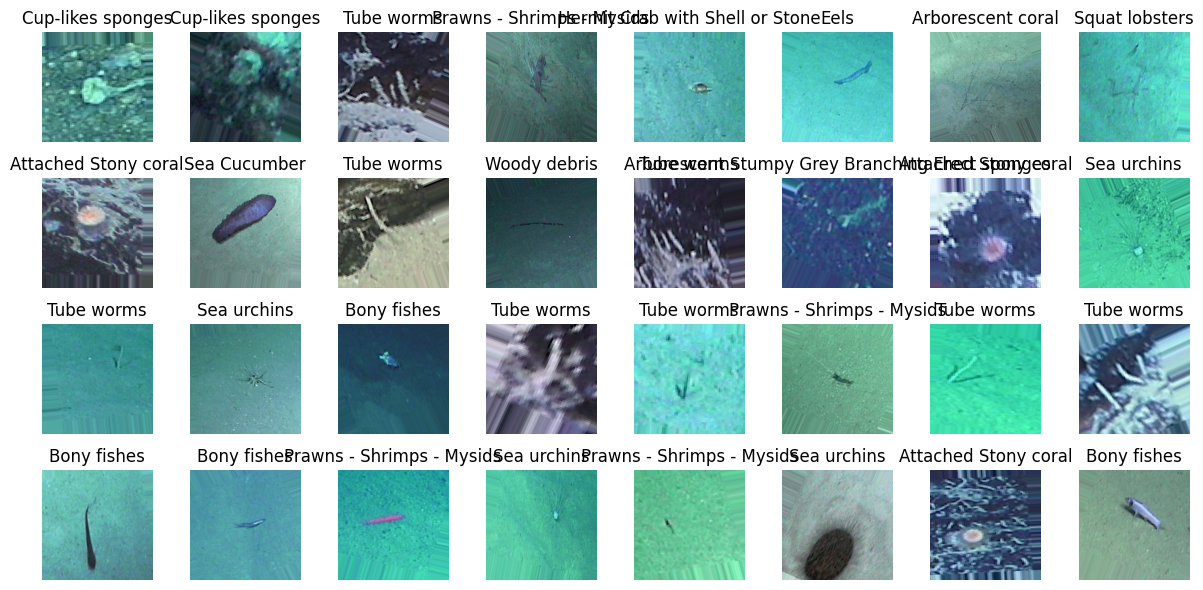

In [16]:
# Visualize the batch
show_batch(images[:32], labels[:32], class_names)